# Clustering(Lesson 4)
## Agglomerative (part 2)

### First of all import needed packages

In [136]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix
from sklearn.datasets import make_blobs
from sklearn import manifold , datasets
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import ndimage
import pandas as pd
import numpy as np
import pylab
import scipy
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [91]:
Data_Frame = pd.read_csv('Cars_Clustering.csv')
Data_Frame.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [92]:
print('Dataset shape : ',Data_Frame.shape)
print(f'This dataset contains {Data_Frame.shape[0]} rows and {Data_Frame.shape[1]} columns')

Dataset shape :  (159, 16)
This dataset contains 159 rows and 16 columns


### Cleaning data

In [93]:
print('Shape of dataset beore cleaning : ',Data_Frame.shape)
Data_Frame[['sales','resale','type','price','engine_s',
       'horsepow','wheelbas','width','length','curb_wgt','fuel_cap',
       'mpg','lnsales']] = Data_Frame[['sales','resale','type','price','engine_s',
       'horsepow','wheelbas','width','length','curb_wgt','fuel_cap',
       'mpg','lnsales']].apply(pd.to_numeric,errors='coerce')
Data_Frame = Data_Frame.dropna()
Data_Frame = Data_Frame.reset_index(drop=True)
print('Shape of dataset after cleaning : ',Data_Frame.shape)
Data_Frame.head()

Shape of dataset beore cleaning :  (159, 16)
Shape of dataset after cleaning :  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [94]:
Data_Frame['KML'] = 236.25 / Data_Frame['mpg']

In [95]:
Data_Frame

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,KML
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0,9.086538
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0,9.086538
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0,8.750000
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0,9.086538


In [96]:
Features = Data_Frame[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','KML']]

In [97]:
x = Features.values
x[0:5]

array([[  1.8       , 140.        , 101.2       ,  67.3       ,
        172.4       ,   2.639     ,  13.2       ,  28.        ,
          8.4375    ],
       [  3.2       , 225.        , 108.1       ,  70.3       ,
        192.9       ,   3.517     ,  17.2       ,  25.        ,
          9.45      ],
       [  3.5       , 210.        , 114.6       ,  71.4       ,
        196.6       ,   3.85      ,  18.        ,  22.        ,
         10.73863636],
       [  1.8       , 150.        , 102.6       ,  68.2       ,
        178.        ,   2.998     ,  16.4       ,  27.        ,
          8.75      ],
       [  2.8       , 200.        , 108.7       ,  76.1       ,
        192.        ,   3.561     ,  18.5       ,  22.        ,
         10.73863636]])

### Normalizing data

In [120]:
# Make all values between 0 and 1
min_max_scaler = MinMaxScaler()

In [121]:
Feature_mtx = min_max_scaler.fit_transform(x)
Feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333, 0.30357143],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333, 0.4       ],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333, 0.52272727],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       , 0.33333333],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333, 0.52272727]])

### Calculate the distance matrix manually

In [138]:
Length = Feature_mtx.shape[0]
Distance = np.zeros([Length,Length])
for i in range(Length) :
    for j in range(Length) :
        Distance[i,j] = scipy.spatial.distance.euclidean(Feature_mtx[i],Feature_mtx[j])
Distance

array([[0.        , 0.585763  , 0.78573911, ..., 0.28685109, 0.25672507,
        0.19866125],
       [0.585763  , 0.        , 0.25892304, ..., 0.36698373, 0.66436916,
        0.62297526],
       [0.78573911, 0.25892304, 0.        , ..., 0.55085974, 0.83285848,
        0.79502645],
       ...,
       [0.28685109, 0.36698373, 0.55085974, ..., 0.        , 0.41920634,
        0.35863999],
       [0.25672507, 0.66436916, 0.83285848, ..., 0.41920634, 0.        ,
        0.15212198],
       [0.19866125, 0.62297526, 0.79502645, ..., 0.35863999, 0.15212198,
        0.        ]], shape=(117, 117))

In [139]:
Z = hierarchy.linkage(Distance,'complete')

C:\Users\veniz\AppData\Local\Temp\ipykernel_4320\1825331023.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(Distance,'complete')


In [140]:
k = 5
clusters = fcluster(Z,k,criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 2, 2,
       4, 3, 4, 1, 3, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       3, 4, 1, 3, 3, 1, 1], dtype=int32)

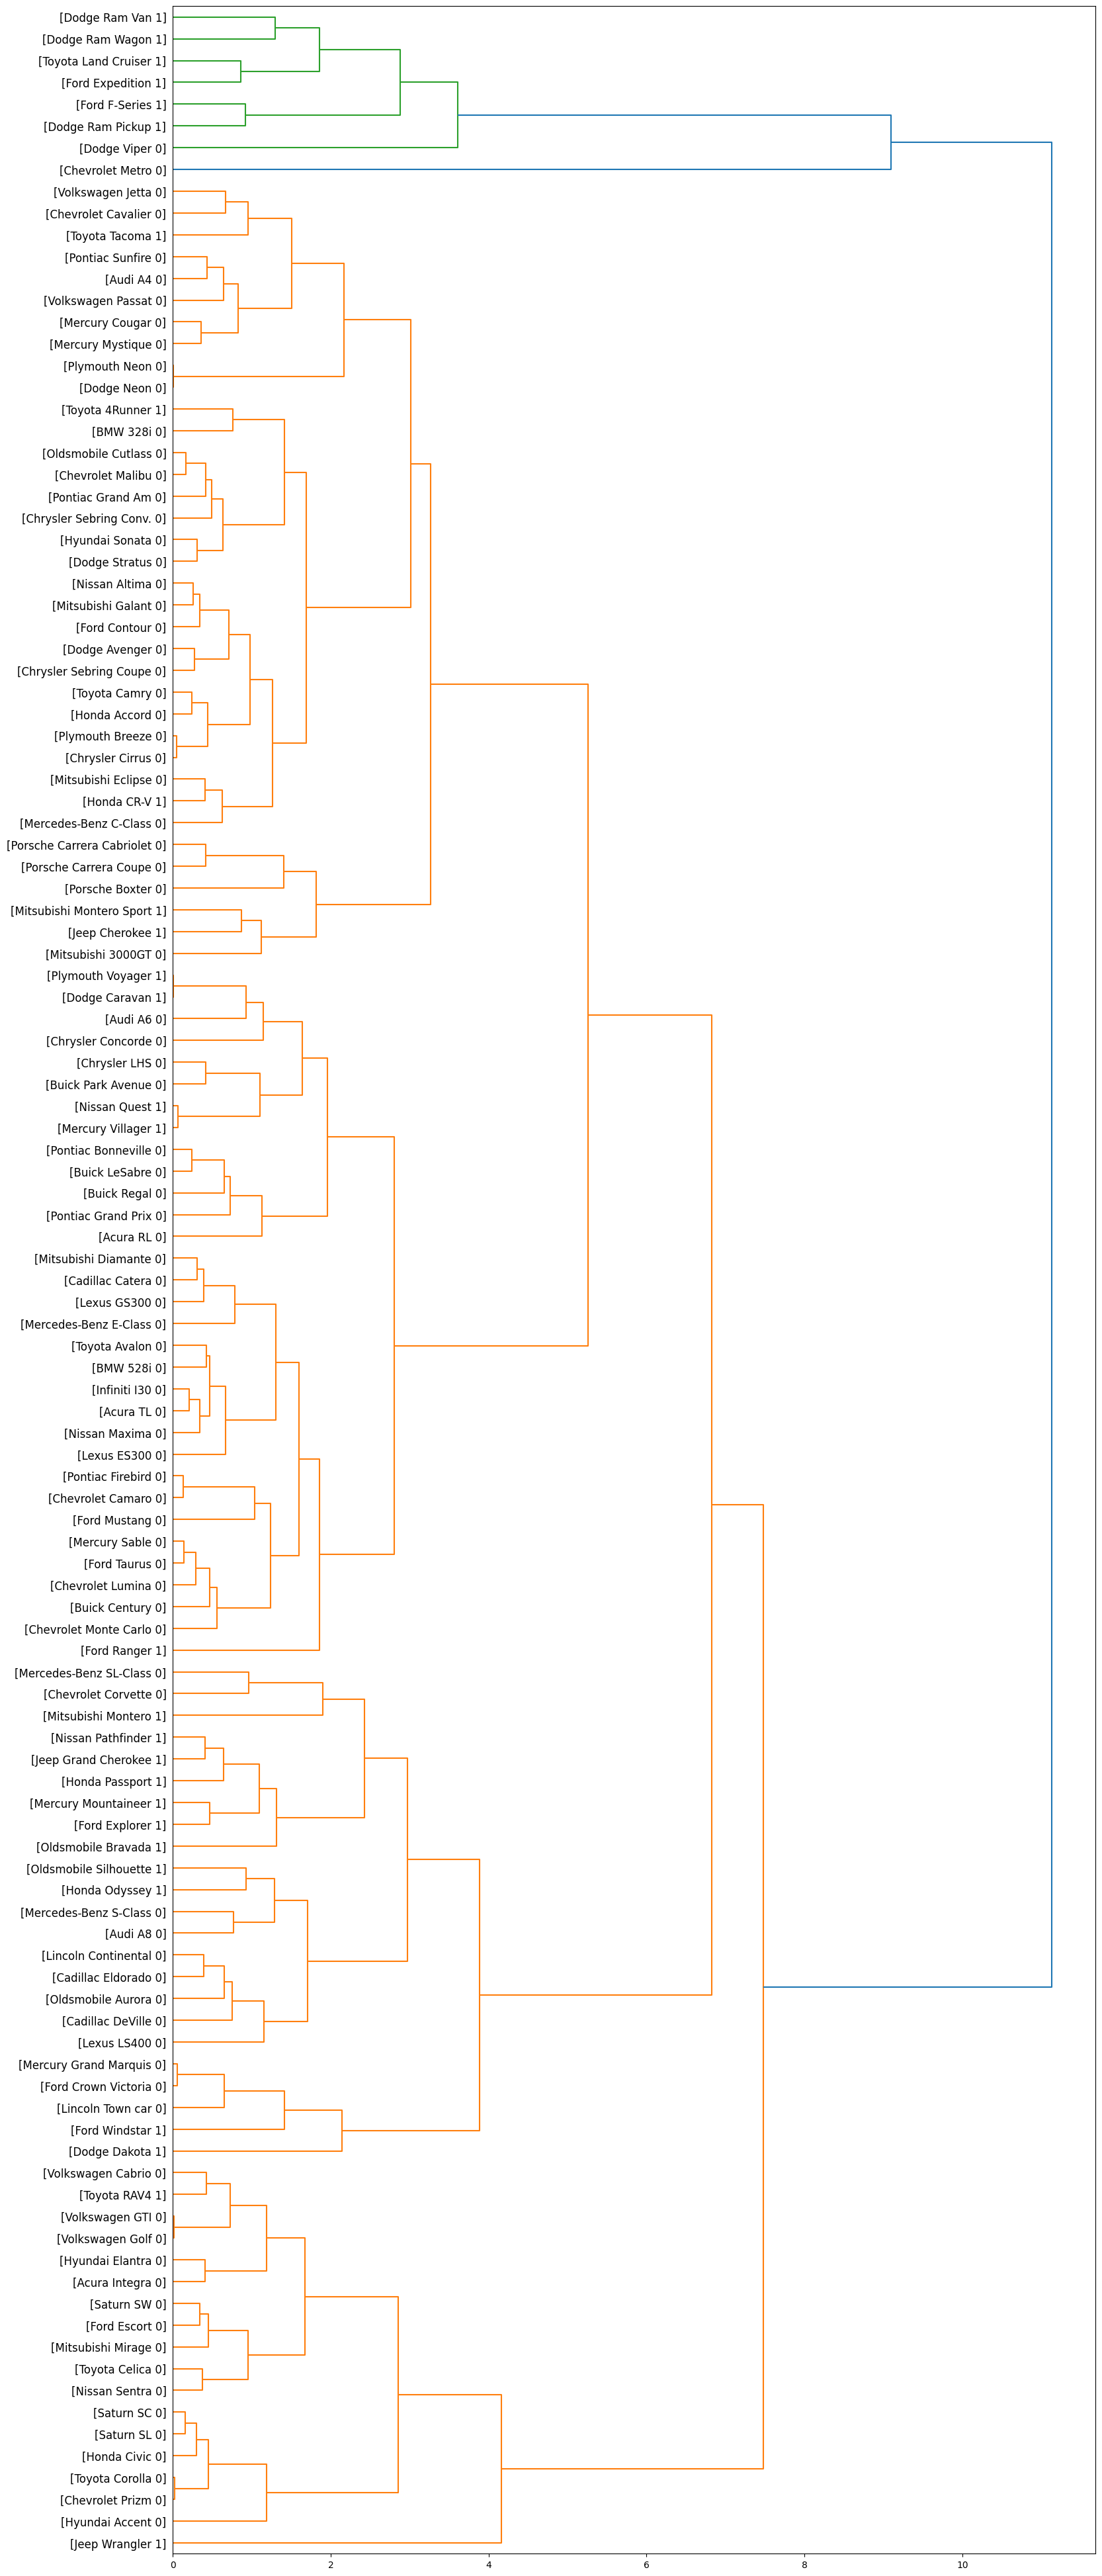

In [141]:
figure = pylab.figure(figsize=(18,50))
def llf(id) :
    return '[%s %s %s]' % (Data_Frame['manufact'][id],Data_Frame['model'][id],
                          int(float(Data_Frame['type'][id])))

dendrogram = hierarchy.dendrogram(Z,leaf_label_func=llf,leaf_rotation=0,leaf_font_size =12,orientation ='right')

### Calculate the distance matrix with Scikit-learn library

In [143]:
Distance_matrix = euclidean_distances(Feature_mtx,Feature_mtx)
print(Distance_matrix)

[[0.         0.585763   0.78573911 ... 0.28685109 0.25672507 0.19866125]
 [0.585763   0.         0.25892304 ... 0.36698373 0.66436916 0.62297526]
 [0.78573911 0.25892304 0.         ... 0.55085974 0.83285848 0.79502645]
 ...
 [0.28685109 0.36698373 0.55085974 ... 0.         0.41920634 0.35863999]
 [0.25672507 0.66436916 0.83285848 ... 0.41920634 0.         0.15212198]
 [0.19866125 0.62297526 0.79502645 ... 0.35863999 0.15212198 0.        ]]


In [144]:
Z_ = hierarchy.linkage(Distance_matrix,'complete')

C:\Users\veniz\AppData\Local\Temp\ipykernel_4320\818358074.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_ = hierarchy.linkage(Distance_matrix,'complete')


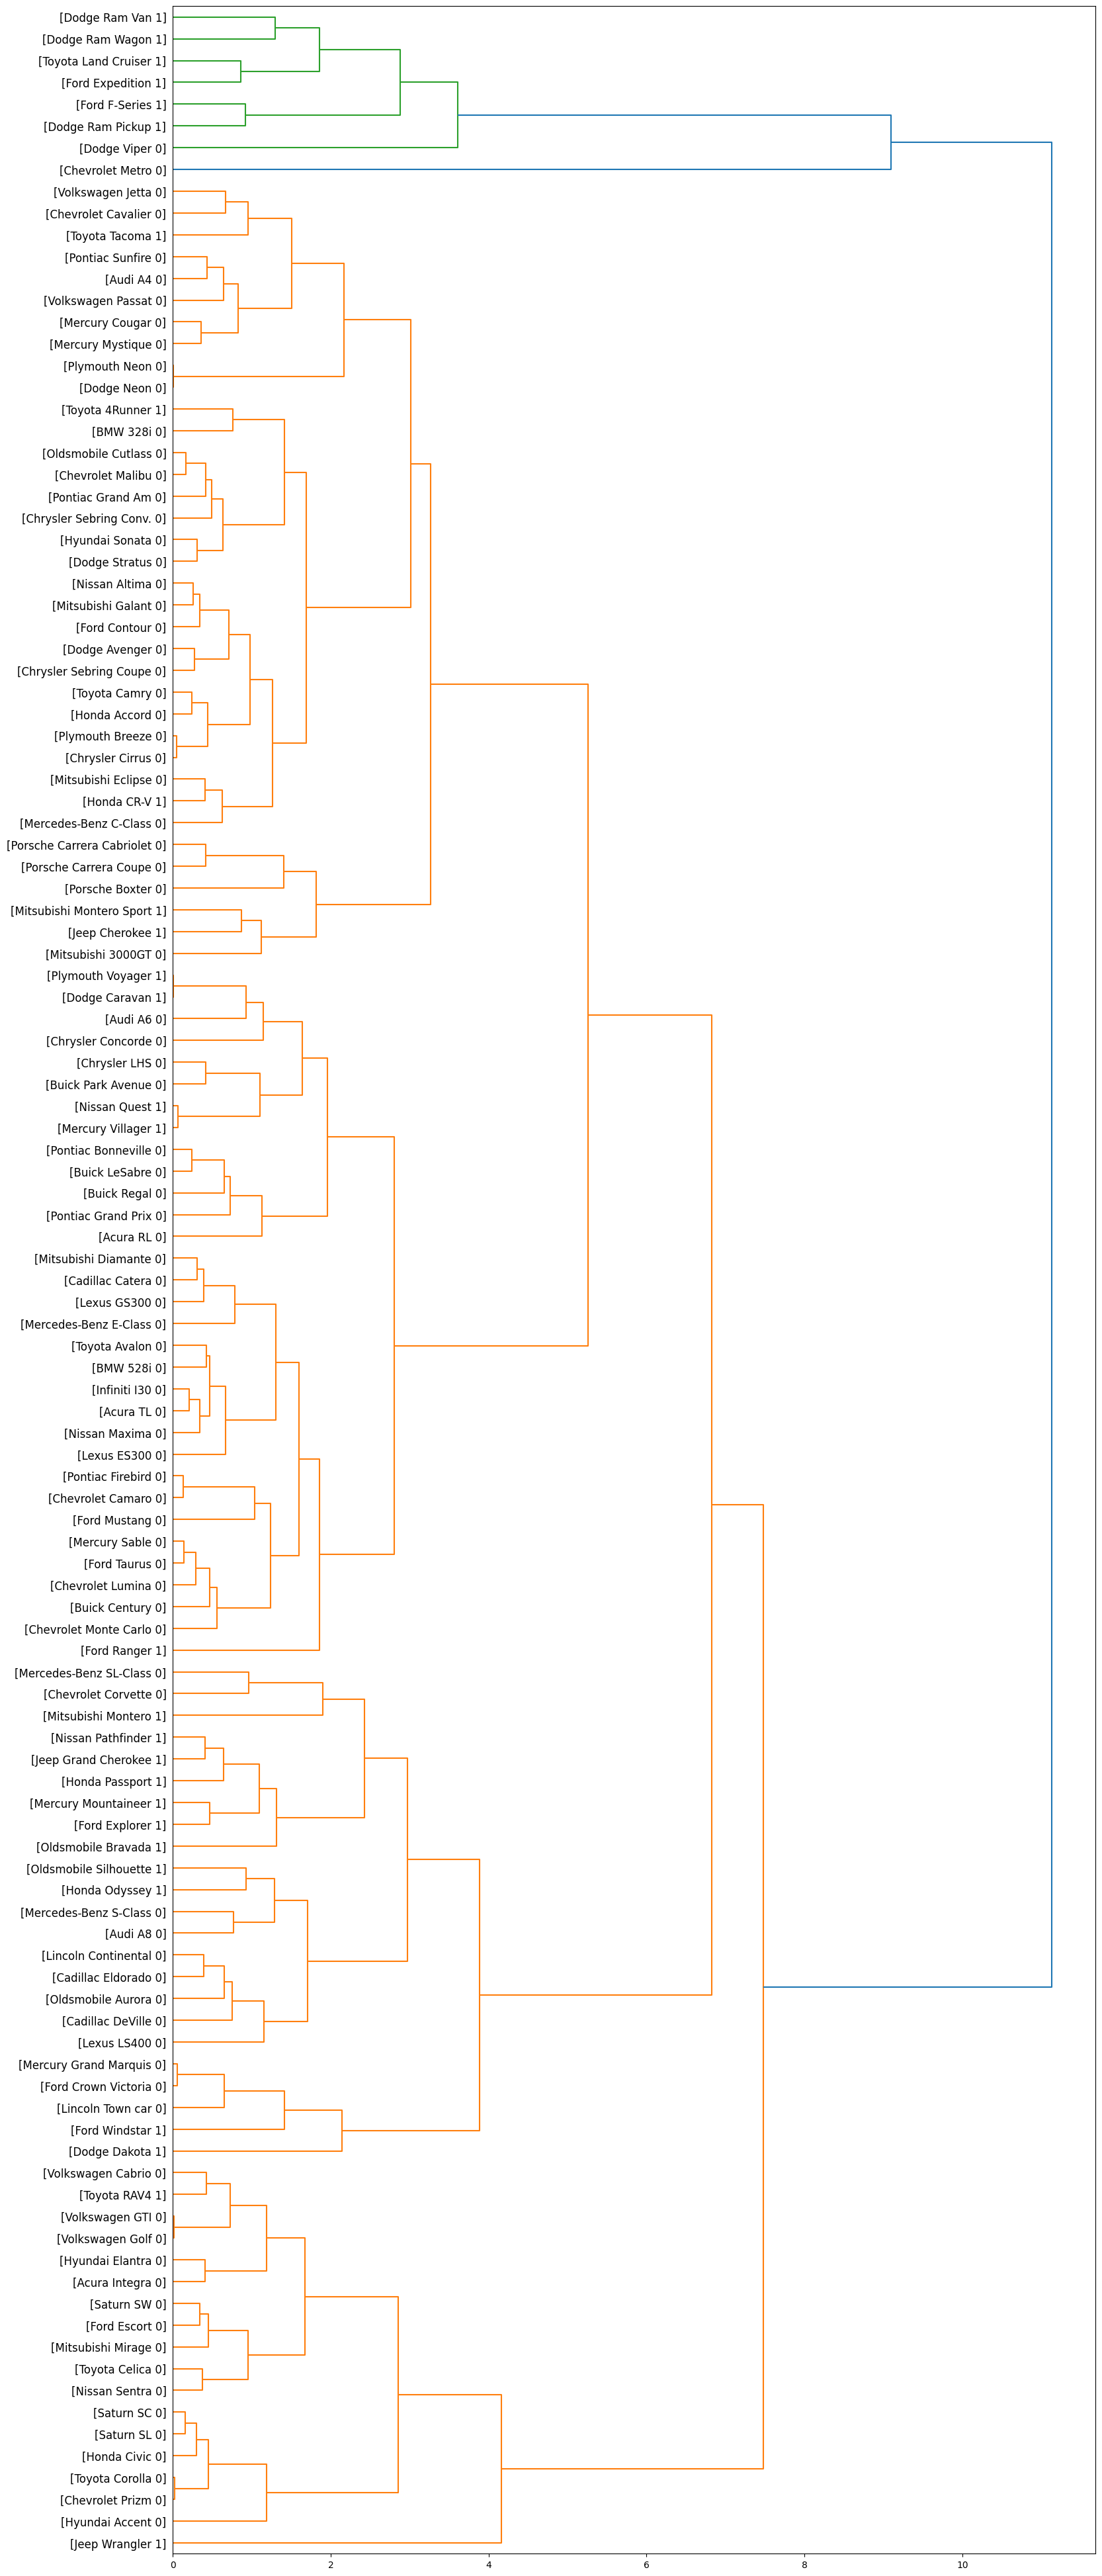

In [145]:
figure = pylab.figure(figsize=(18,50))
def llf(id) :
    return '[%s %s %s]' % (Data_Frame['manufact'][id],Data_Frame['model'][id],
                          int(float(Data_Frame['type'][id])))

dendrogram = hierarchy.dendrogram(Z_,leaf_label_func=llf,leaf_rotation=0,leaf_font_size =12,orientation ='right')

In [146]:
Agglomerative_clustering = AgglomerativeClustering(n_clusters=6,linkage='complete')
Agglomerative_clustering.fit(Distance_matrix)
Agglomerative_clustering.labels_

C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\sklearn\cluster\_agglomerative.py:584: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 2, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 1, 0,
       5, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 3, 3, 1, 2, 0, 2, 4, 2, 1, 1, 1,
       3, 2, 3, 0, 4, 4, 1, 1, 0, 0, 4, 2, 0, 4, 1, 2, 2, 1, 1, 1, 0, 4,
       4, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 4, 2, 1, 1, 0, 4, 2, 2, 1, 4, 1,
       1, 1, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 4, 2, 0, 4, 0,
       4, 3, 0, 4, 4, 0, 0])

In [147]:
for i in range(len(Agglomerative_clustering.labels_)) :
    print(f'car number {i+1} is in cluster {Agglomerative_clustering.labels_[i]}')
    if i+1 >= 10 :
        break

car number 1 is in cluster 0
car number 2 is in cluster 2
car number 3 is in cluster 2
car number 4 is in cluster 4
car number 5 is in cluster 2
car number 6 is in cluster 1
car number 7 is in cluster 4
car number 8 is in cluster 2
car number 9 is in cluster 2
car number 10 is in cluster 2


In [148]:
Data_Frame['cluster_'] = Agglomerative_clustering.labels_
Data_Frame.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,KML,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,4
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,2


For color set [0.5 0.  1.  1. ] , I chosed cluster 0
For color set [0.1        0.58778525 0.95105652 1.        ] , I chosed cluster 1
For color set [0.3        0.95105652 0.80901699 1.        ] , I chosed cluster 2
For color set [0.7        0.95105652 0.58778525 1.        ] , I chosed cluster 3
For color set [1.         0.58778525 0.30901699 1.        ] , I chosed cluster 4
For color set [1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00] , I chosed cluster 5


C:\Users\veniz\AppData\Local\Temp\ipykernel_4320\2754796714.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


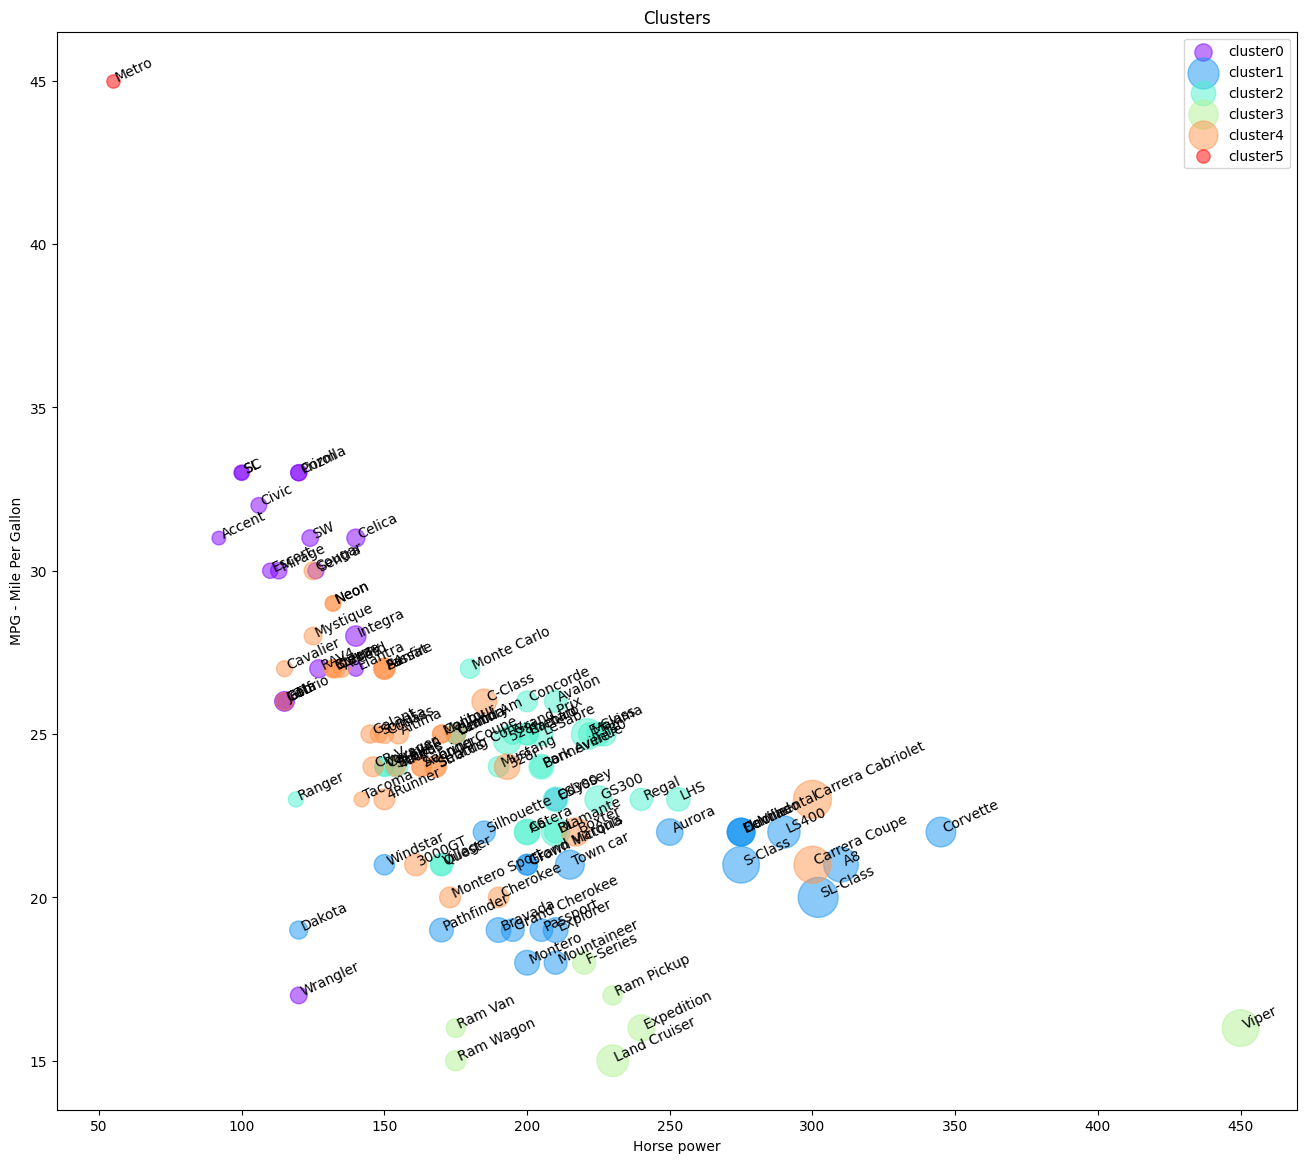

In [149]:
n_clusters = max(Agglomerative_clustering.labels_) + 1
colors = cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels = list(range(0,n_clusters))
plt.figure(figsize=(16,14))
for color , label in zip(colors,cluster_labels) :
    print(f'For color set {color} , I chosed cluster {label}')
    subset = Data_Frame[Data_Frame.cluster_ == label]
    for i in subset.index :
        plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Horse power')
plt.ylabel('MPG - Mile Per Gallon')
plt.show()

In [150]:
Data_Frame.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     16
          1.0      2
1         0.0     12
          1.0     11
2         0.0     27
          1.0      5
3         0.0      1
          1.0      6
4         0.0     31
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [151]:
Aggregated_cars = Data_Frame.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
Aggregated_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   117.250000  1.850000  30.000000  14.330125
         1.0   123.500000  2.250000  22.000000  15.674000
1        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   185.909091  3.518182  19.636364  26.856727
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   151.800000  2.780000  22.600000  19.874800
3        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
4        0.0   161.645161  2.451613  25.483871  23.390516
         1.0   160.200000  2.820000  22.000000  19.702600
5        0.0    55.000000  1.000000  45.000000   9.235000

C:\Users\veniz\AppData\Local\Temp\ipykernel_4320\4207595101.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
C:\Users\veniz\AppData\Local\Temp\ipykernel_4320\4207595101.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'MPG - Mile Per Gallon')

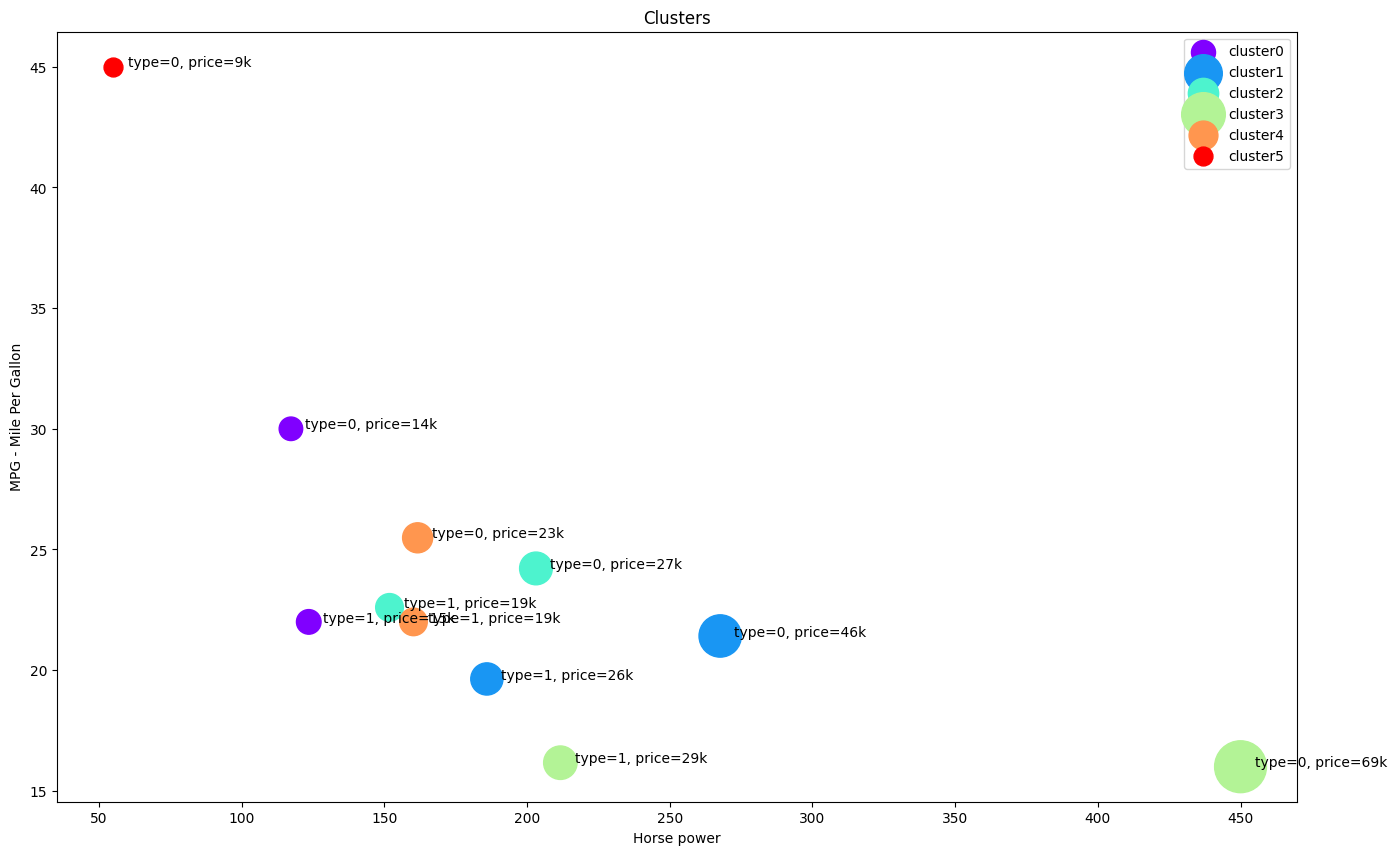

In [152]:
plt.figure(figsize=(16,10))
for color, label in zip(colors,cluster_labels):
    subset = Aggregated_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Horse power')
plt.ylabel('MPG - Mile Per Gallon')